In [1]:
import warnings

# Tüm uyarıları kapat
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/11-iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### EDA and Feature Engineering

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


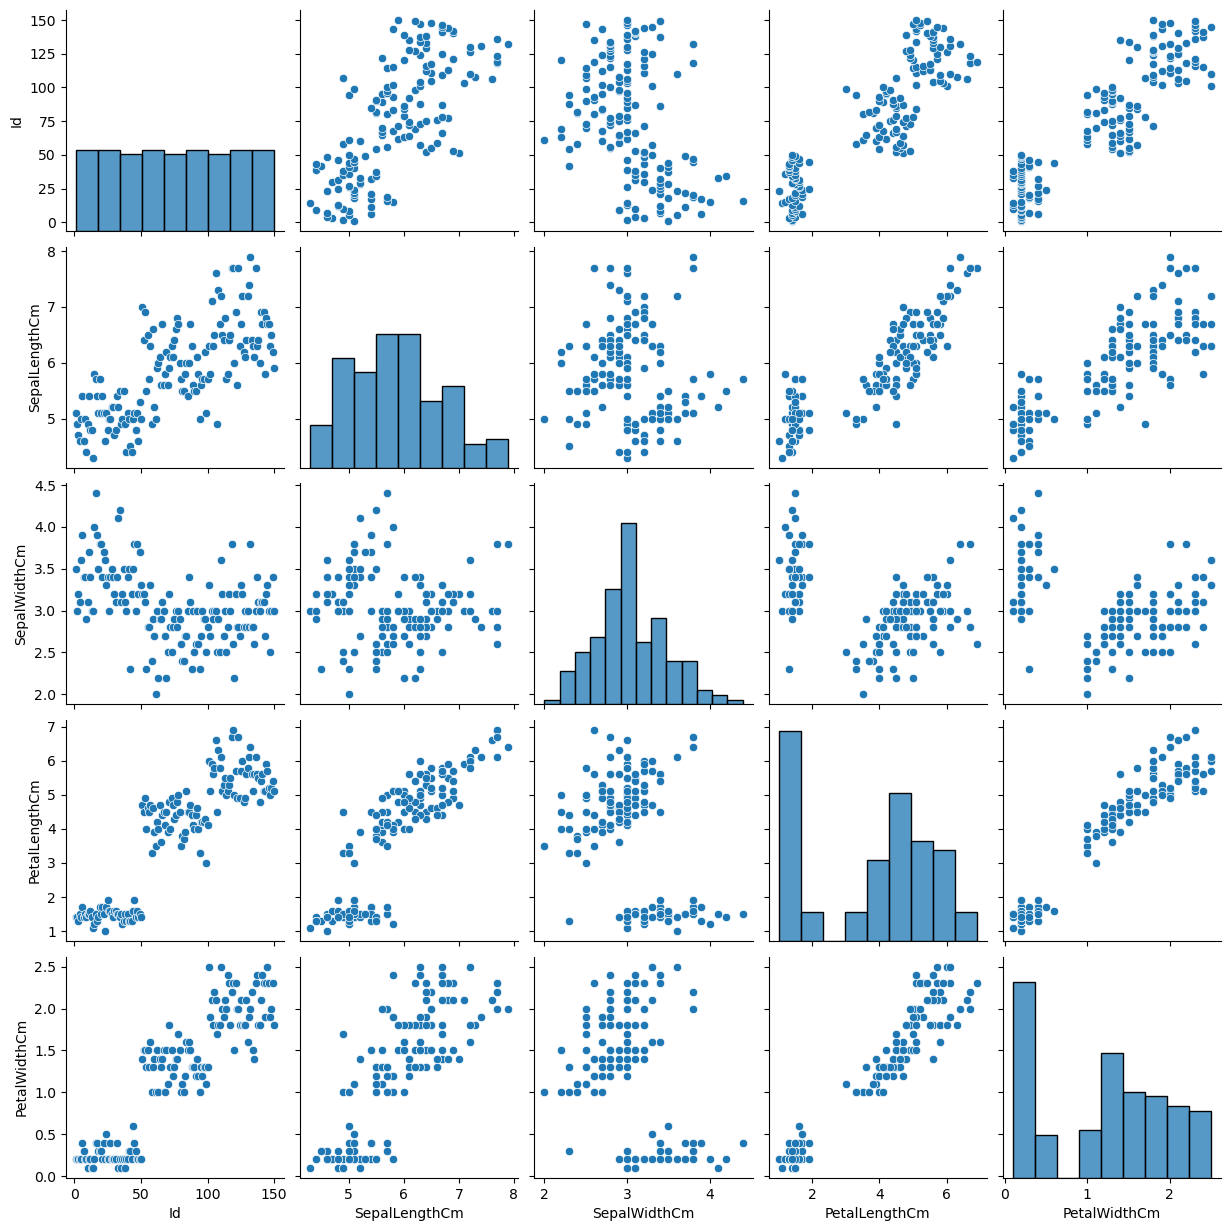

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [8]:
df = df.drop("Id", axis=1)

##### Train-Test Split and Scaling

In [9]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "C" : [0.001, 0.1, 1, 100, 1000],
    "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

grid = GridSearchCV(estimator=LogisticRegression(), cv=5, param_grid=param_grid, n_jobs=-1, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [12]:
grid.best_params_

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid.predict(X_test_scaled)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classifaciton Report: ", classification_report(y_test, y_pred))

Confusion Matrix:  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Accuracy Score:  1.0
Classifaciton Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### SVC

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C" : [0.1, 1, 100, 1000],
    "kernel" : ["linear", "poly", "rbf"],
    "gamma" : ["scale", "auto"]
}

grid = GridSearchCV(estimator=SVC(), cv=5, param_grid=param_grid, n_jobs=-1, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = grid.predict(X_test_scaled)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classifaciton Report: ", classification_report(y_test, y_pred))


Confusion Matrix:  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Accuracy Score:  1.0
Classifaciton Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classifacitaion Report: ", classification_report(y_test, y_pred))

Confusion Matrix:  [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Accuracy Score:  1.0
Classifacitaion Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



###